In [1]:
GPS_DATA_DIRECTORY = "data/GPSData"

# Automated load and dump detection for trucks with Light Gradient-Boosting Machine (LightGBM)

This notebook showcases the application of an automated algorithm for detecting loading and dumping events. LightGBM is employed, a highly efficient state-of-the-art gradient boosting framework that uses decision trees as weak learners. Additional insights into the methodology can be found in [Website Link] and [LaTeX Document].

The custom machine learning class created for this project, LoadDumpLightGBM, utilizes functions in folder: **helper_functions** and in **load_dump_lightgbm.py**. LoadDumpLightGBM accepts the following initial arguments:

* *group_size*: Defines the number of data points to be aggregated in the GPS dataset. A larger *group_size* results in a broader time window, enhancing the model's predictive accuracy for loading or dumping events within that timeframe. However, this comes at the cost of temporal precision regarding when these events occur.

* *nb_days*: Specifies the number of days to be analyzed. The option 'all' is available for those wishing to leverage their entire dataset. While utilizing more days is likely to improve predictive performance, it will also increase both data-loading and model-training time. The training time increases approximately linearly with *nb_days*.

* *work_dir*: Refers to the relative path where output files will be stored. 

# Datastructure

In [2]:
from load_dump_lightgbm import LoadDumpLightGBM
myModel = LoadDumpLightGBM(nb_days=1, gps_data_dir=GPS_DATA_DIRECTORY) 

Folders 'trips' and 'tripsInfo' correctly set up


ValueError: The 'nb_days' parameter (100) cannot be greater than the numberof days in GPSData/trips: (73).

Load GPSData and convert to a functional structure for the model by using the load_data method. This should take some time, increasing for a higher number of days.

In [3]:
myModel.load_data()

Start at day  03-07-2022
For machine type:  Truck


100%|██████████| 1/1 [00:43<00:00, 43.87s/it]


Fit the model to the data set. The fit method will return the learning curve of the training process, providing the logloss of both the training and validation data set. The training process is determined based on a early stopping criteria. If validation error does not increase over a period of n_iterations (2 in this case), training is terminated. 

Additionally, the importance of each feature in the data set is provided. The higher the value on the x-axis, the higher importance. The x-value signals the number of times each feature is used to split a node in the decision trees, consequently the feature utilized for the maximal information gain.

In [4]:
myModel.fit_model()

myModel.plot_learning_curve()
myModel.plot_feature_importances()

Training until validation scores don't improve for 2 rounds
Early stopping, best iteration is:
[132]	Train's multi_logloss: 0.000529723	Val's multi_logloss: 0.0317205


The predict method..

In [5]:
myModel.predict_and_save_csv()

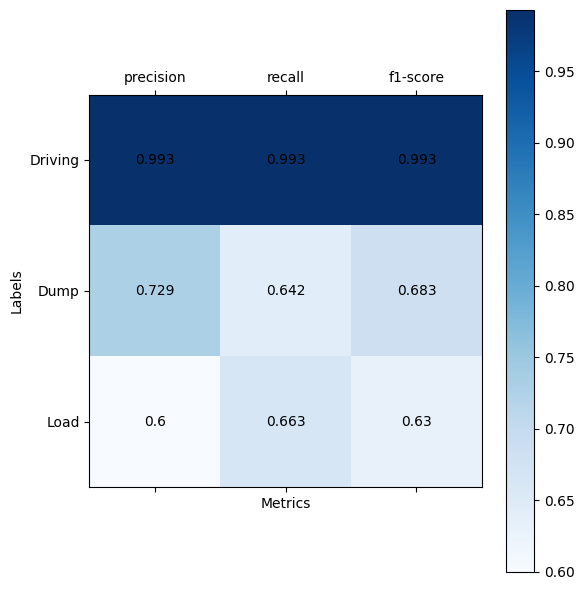

In [6]:
myModel.plot_statistics()

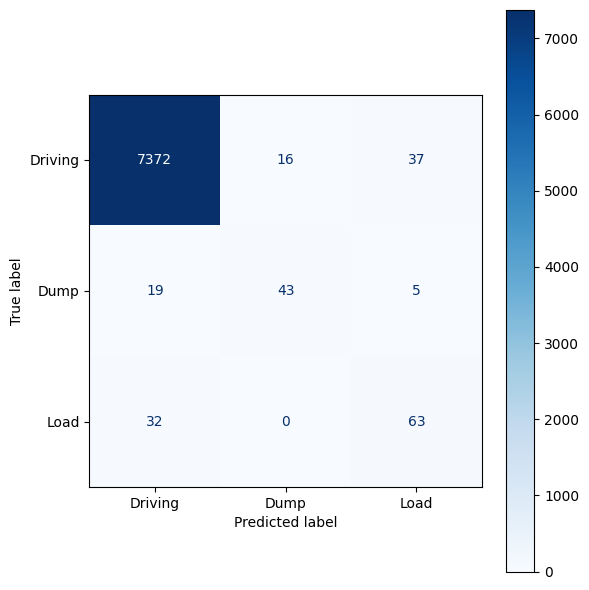

In [7]:
myModel.plot_confusion_matrix()